In [75]:
import tensorflow as tf
import numpy as np
import matplotlib.pylab as plt
from sklearn.metrics import classification_report

# Cartful Solutions - Technical test - Data Science

### Important

1. write the code for every answer, store the answers as variables and print the variable in the notebook. The process to answer each task, should be in the notebook.
2. Answer 

## 0. Dataset load and context comprehension

### Tasks
* Split dataset into train and test for independent and dependent variables
* Convert independent variables for train and test sets into float numbers
* What is the range of values for the independent variables
* Considering dataset context, why are the independent variables within that range, what do values represent?
* Convert the independent variable values within the range [0,1]
* What is the range of values of the dependent variables?
* Considering dataset context, why are the dependent variables within that range, what do values represent?
* Based on the data, what is the dimension of the input vectors
* Choose a random vector from the test set, the element is flattenized, reshape it into the original shape with 1 channel following the dimension height x width x channel
* Visually display the 2D vector using matplotlib imshow module. What value is displayed?
* Based on independent variable dimension, how many color channels does the dataset use?

In [30]:
dataset = tf.keras.datasets.mnist

In [31]:
# Note: The data is being loaded, following the structure ((train), (test)) sets
data = dataset.load_data()

In [32]:
# Load the data into training and test set
(x_train, y_train), (x_test, y_test) = data

In [33]:
# What is the range of values for the independent variables
print(x_train.dtype)
print(x_train.shape)
np.unique(x_train)

uint8
(60000, 28, 28)


array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

By observing the data and researching a bit about the dataset we know that the range of independent variables goes from 0-255. The dataset contains 60k 28x28 grayscale images of numbers.

In [34]:
# Considering dataset context, why are the independent variables within that range, what do values represent?

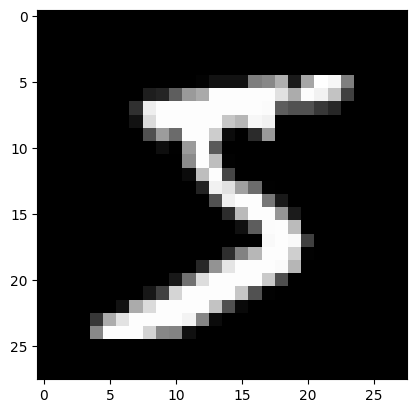

In [35]:
fig = plt.figure
plt.imshow(x_train[0], cmap='gray')
plt.show()

The values represent a pixel in grayscale of number images.

In [36]:
# What is the range of values of the dependent variables?

In [95]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

(array([5923., 6742., 5958., 6131., 5842., 5421., 5918., 6265., 5851.,
        5949.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

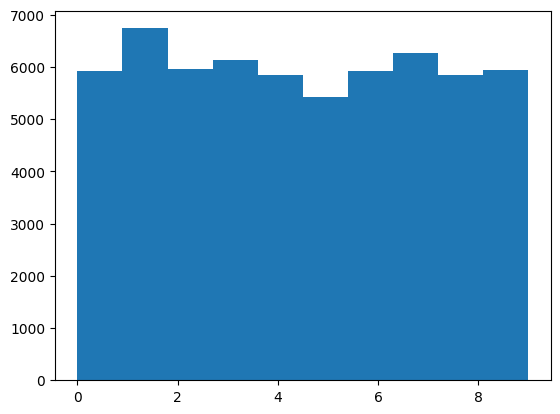

In [72]:
plt.hist(y_train)

The range of values of dependent variables is from 0-9.

In [37]:
# Considering dataset context, why are the dependent variables within that range, what do values represent?

The values represent the number shown in the image.

In [38]:
# Convert independent variables for train and test sets into float numbers

In [39]:
x_train = x_train.astype(float)
x_test = x_test.astype(float)

print(x_train.dtype)
print(x_test.dtype)

float64
float64


In [40]:
# Convert input variables within range [0,1]

In [41]:
x_train = x_train / 255
x_train = x_train / 255

In [42]:
# Based on the data, what is the dimension of the input vectors?

In [43]:
x_train.shape

(60000, 28, 28)

There are 60,000 vectors of dimesions 28x28

In [44]:
# Choose a random vector from the test set.flatten()
# Flattenize the vector using vector.flatten(), what is this vector shape?
# Reshape it into the original shape with 1 color channel following the dimension height x width x channel

In [45]:
vector = x_train[0].flatten()
print(vector.shape)

vector = vector.reshape(28,28,1)
vector.shape

(28, 28, 1)

In [46]:
# Visually display the 2D vector using matplotlib imshow module. What value is displayed?

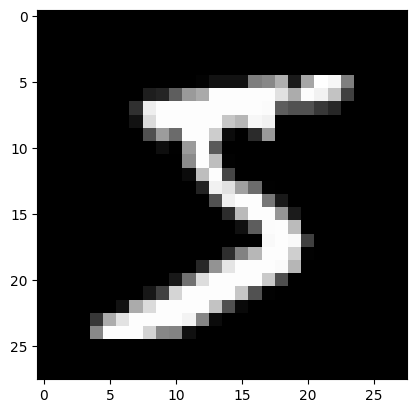

In [47]:
plt.imshow(vector, cmap='gray')

In [48]:
# Based on independent variable dimension, how many color channels does the dataset use?

It uses a single color channel. It represents pixels only on a grayscale.

In [49]:
# Please make sure that all tasks have been answered.

## 1. Tensorflow implementation

Using the code below, answer and implement the solution to each question.

In [50]:
IN_SHAPE = x_train[0].shape
print(IN_SHAPE)

OUT_SHAPE = np.unique(y_test).size
print(OUT_SHAPE)

UNITS = IN_SHAPE[0] * IN_SHAPE[1]
print(UNITS)

(28, 28)
10
784


In [96]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(
        input_shape=IN_SHAPE
    ),
    tf.keras.layers.Dense(
        units=UNITS,
        activation="relu",
        use_bias=True,
        kernel_initializer="glorot_uniform",
        bias_initializer="zeros",
        kernel_regularizer=None,
        bias_regularizer=None,
        activity_regularizer=None,
        kernel_constraint=None,
        bias_constraint=None
    ),
    tf.keras.layers.Dense(
        units=UNITS/2,
        activation="relu",
        use_bias=True,
        kernel_initializer="glorot_uniform",
        bias_initializer="zeros",
        kernel_regularizer=None,
        bias_regularizer=None,
        activity_regularizer=None,
        kernel_constraint=None,
        bias_constraint=None
    ),
    tf.keras.layers.Dense(
        units=UNITS/4,
        activation="relu",
        use_bias=True,
        kernel_initializer="glorot_uniform",
        bias_initializer="zeros",
        kernel_regularizer=None,
        bias_regularizer=None,
        activity_regularizer=None,
        kernel_constraint=None,
        bias_constraint=None
    ),
    tf.keras.layers.Dense(
        units=UNITS/8,
        activation="relu",
        use_bias=True,
        kernel_initializer="glorot_uniform",
        bias_initializer="zeros",
        kernel_regularizer=None,
        bias_regularizer=None,
        activity_regularizer=None,
        kernel_constraint=None,
        bias_constraint=None
    ),
    tf.keras.layers.Dense(
        units=UNITS/16,
        activation="relu",
        use_bias=True,
        kernel_initializer="glorot_uniform",
        bias_initializer="zeros",
        kernel_regularizer=None,
        bias_regularizer=None,
        activity_regularizer=None,
        kernel_constraint=None,
        bias_constraint=None
    ),
    # tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(
        units=OUT_SHAPE
    )
])



### Tasks
* Update model input tensor shape, with the shape of the dataset input vectors.
* Choose and set activation function for hidden layers and explain why you chose that option, update the model with that activation function.
* Would you add bias to the layers? Explain why or why not, and add bias to all layers if you answered yes.
* Update number of nodes in each layer to match the following rule:
    - First hidden layer, should be the same number of nodes as the input layer flattenized. Hint: nodes = h x w
    - Each layer should be 1/2x of the previous layer nodes (x = previous layer nodes). This exception is for the output layer that will be added in the next step.
* Add an output layer:
    - How many nodes will have the output layer based on the dataset? Specify the number of nodes in the output layer in the model.
    - Which activation function would you use for the output layer, explain why, and add it to the model.
* Train the model using the training set
* Evaluate the model accuracy
    - What does the loss mean? What is the loss for the model?
    - What does accuracy mean? What is the accuracy of the model?
* Why would you add dropout layers to the model?
* Add a dropout layer previous the output layer with 20% dropout, compare the 2 models loss and accuracy. Which one was better?

I chose the ReLU activation function because it prevents the vanishing gradient problem and usually performs better than other functions.

Yes, I would add bias to all the layers. In Tensorflow it is the default value due to the fact that it helps the network get better results. A good analogy would be the y-intercept in a linear function (y=mx+b).

The output layer should have 10 nodes to represent every posible value in the dependent variable (0-9).
<br>
The output layer doesn't necessarily needs an activation function. However, the results should be passed to a softmax function to generate probabilities in a multi-class clasification problem.

Loss is the difference between the actually true values to the predicted ones by the model.
<br>
Accuracy is the percentage of the total predictions that the model predicted correctly.

Dropout layers are a powerful tool to prevent overfitting in a model.

# 2. Model compilation

### Tasks
- Explain which loss metric would you use for this dataset where you expect to classify inputs.
- Compile the model with that loss metric.

# 3. Model evaluation

### Tasks
- Evaluate the model loss and accuracy.
- Build confussion matrix for the model that has the dropout layer, and explain the confusion matrix relevant metrics.

Tensorflow recommends a SparseCategoricalCrossentropy loss function for multi-class classification problems, so that would be a good starting point and what I chose to add to this network.

In [97]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

### Without dropout

In [98]:
# Fit the model with the train set, use 10 epochs

model.fit(x_train, y_train, epochs=10)

Epoch 1/10
   1/1875 [..............................] - ETA: 11:42 - loss: 2.3026 - accuracy: 0.0625

2023-02-03 18:29:48.127216: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 13s 7ms/step - loss: 0.6037 - accuracy: 0.8015
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2229 - accuracy: 0.9330
Epoch 3/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1545 - accuracy: 0.9530
Epoch 4/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1210 - accuracy: 0.9633
Epoch 5/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1025 - accuracy: 0.9687
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0889 - accuracy: 0.9726
Epoch 7/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0786 - accuracy: 0.9759
Epoch 8/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0711 - accuracy: 0.9783
Epoch 9/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0623 - accuracy: 0.9811
Epoch 10/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0565

In [99]:
model.evaluate(x_test, y_test, verbose=2)

2023-02-03 18:31:54.259569: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 - 1s - loss: 26994.0586 - accuracy: 0.8742 - 1s/epoch - 4ms/step


[26994.05859375, 0.8742000460624695]

### With dropout

In [55]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
   8/1875 [..............................] - ETA: 14s - loss: 2.3035 - accuracy: 0.0977  

2023-02-03 17:54:13.958986: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 14s 7ms/step - loss: 0.7144 - accuracy: 0.7538
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2460 - accuracy: 0.9302
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1693 - accuracy: 0.9508
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1341 - accuracy: 0.9615
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1119 - accuracy: 0.9679
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0956 - accuracy: 0.9724
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0842 - accuracy: 0.9757
Epoch 8/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0765 - accuracy: 0.9774
Epoch 9/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0674 - accuracy: 0.9798
Epoch 10/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0606

In [56]:
# Evaluate the model with verbose=2 to know loss and accuracy metrics for the test set
model.evaluate(x_test, y_test, verbose=2)

2023-02-03 17:56:26.298686: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 - 1s - loss: 14758.2148 - accuracy: 0.9218 - 1s/epoch - 5ms/step


[14758.21484375, 0.9218000173568726]

The model with dropout performed better than the one without it.

In [59]:
y_true = y_test

y_pred = model.predict(x_test)
y_pred = tf.keras.layers.Softmax()(y_pred)
y_pred = tf.argmax(y_pred, axis=1)

313/313 [==============================] - 1s 2ms/step


In [70]:
y_pred.numpy()

array([7, 2, 1, ..., 4, 5, 6])

In [74]:
confusion_matrix = tf.math.confusion_matrix(labels=y_true, predictions=y_pred)
confusion_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 968,    0,    0,    1,    0,    4,    4,    3,    0,    0],
       [   0, 1130,    0,    2,    0,    1,    2,    0,    0,    0],
       [   8,    6,  981,   16,    1,    2,    5,   13,    0,    0],
       [   0,    0,    1,  996,    0,    7,    0,    5,    0,    1],
       [   2,   11,    1,    0,  935,    0,   11,   17,    0,    5],
       [   2,    1,    0,   18,    1,  860,    4,    3,    2,    1],
       [   7,    4,    1,    0,    4,    9,  932,    1,    0,    0],
       [   0,   10,    3,    5,    0,    0,    0, 1007,    0,    3],
       [   4,  103,   45,  203,    5,   33,    9,   40,  522,   10],
       [   4,   11,    0,   19,    7,    3,    2,   76,    0,  887]],
      dtype=int32)>

In [77]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.89      1.00      0.94      1135
           2       0.95      0.95      0.95      1032
           3       0.79      0.99      0.88      1010
           4       0.98      0.95      0.97       982
           5       0.94      0.96      0.95       892
           6       0.96      0.97      0.97       958
           7       0.86      0.98      0.92      1028
           8       1.00      0.54      0.70       974
           9       0.98      0.88      0.93      1009

    accuracy                           0.92     10000
   macro avg       0.93      0.92      0.92     10000
weighted avg       0.93      0.92      0.92     10000



# 4. Analysis

### Tasks
- What is the category that gets classified incorrectly the most
    - what would you do to solve this issue?
* Get the first 10 elements of the dependent variable test set. Suppose these values are the only ones that we would like to classify.
    - Considering our Neural Network architecture, how many nodes would the output layer have if we train with this scenario?
    - Considering our Neural Network architecture, if we increase the input tensor shape to 45x45, how many nodes would each hidden layer have?

* The caterogy that gets misclassified the most is class 3 with 0.79 precision.
    - (1) We could adjust the loss function to penalize wrong classifications of this class or (2) we could add more observations of this class via oversampling to provide more data to the model to learn to classify this observation.

In [85]:
unique_vals = np.unique(y_train[:10])
print(unique_vals)
print(unique_vals.size)

[0 1 2 3 4 5 9]
7


If we only took the first 10 values then there would only be 7 output layer nodes as shown above. The number of nodes per dense layer are shown below.

In [94]:
NEW_UNITS = 45*45
print("Dense layer 1 nodes:", NEW_UNITS)
print("Dense layer 2 nodes:", NEW_UNITS//2)
print("Dense layer 3 nodes:", NEW_UNITS//4)
print("Dense layer 4 nodes:", NEW_UNITS//8)
print("Dense layer 5 nodes:", NEW_UNITS//16)

Dense layer 1 nodes: 2025
Dense layer 2 nodes: 1012
Dense layer 3 nodes: 506
Dense layer 4 nodes: 253
Dense layer 5 nodes: 126


# On completion

Push this notebook to your personal repository and share the repository URL via email. Best of the luck.